In [1]:
import pandas as pd
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt

In [2]:
file_list = glob.glob('files/*.csv')
n = len(file_list)
print(n)

5


In [3]:
file_values = []
for file_path in file_list:
    file = pd.read_csv(file_path, header=None)
    file = file.drop(0, axis=1)
    file_values.append(file)

In [4]:
fuse = file_values[0]

In [5]:
for i in range(1,n):
    fuse = fuse+file_values[i]
    
fuse = fuse/n

fuse = fuse.astype(int)

In [7]:
fuse.to_csv('all.csv',header=False, index=True)

In [6]:
fuse

1    2    3    4    5    6    7    8    9    10   ...  331  332  333  \
0      167  167  167  166  166  166  166  166  165  165  ...  140  140  140   
1      167  167  167  167  166  166  166  165  165  165  ...  140  140  140   
2      167  167  167  166  166  166  166  165  165  165  ...  140  140  140   
3      167  167  166  166  166  166  165  165  165  165  ...  140  140  140   
4      167  167  166  166  166  166  166  165  165  165  ...  140  140  140   
5      167  167  166  166  166  166  166  165  165  165  ...  140  140  140   
6      167  167  166  166  166  166  166  165  165  165  ...  140  140  140   
7      167  167  167  166  166  166  166  165  165  165  ...  140  140  140   
8      167  167  167  166  166  166  166  166  165  165  ...  140  140  140   
9      167  167  166  166  166  166  166  166  165  165  ...  140  140  140   
10     167  167  166  166  166  166  166  166  165  165  ...  140  140  140   
11     167  167  166  166  166  166  165  165  165  165  ...  140  140  141   
12     167  167  166  166  166  166  165  165  165  165  ...  140  140  141   
13     167  167  167  166  166  166  165  165  165  165  ...  140  141  141   
14     168  167  167  166  166  166  165  165  165  165  ...  140  141  141   
15     167  167  167  166  166  166  166  165  165  165  ...  140  141  141   
16     167  167  167  167  166  166  166  166  165  165  ...  141  141  141   
17     167  167  167  167  166  166  166  166  165  165  ...  141  141  141   
18     168  167  167  167  166  166  166  166  166  165  ...  141  141  142   
19     168  167  167  167  166  166  166  166  166  165  ...  141  141  142   
20     168  168  167  167  166  166  166  166  165  165  ...  141  142  142   
21     168  168  167  167  167  166  166  166  165  165  ...  141  142  142   
22     168  168  167  167  167  166  166  166  165  165  ...  141  142  142   
23     168  168  168  167  167  166  166  166  165  165  ...  142  142  143   
24     168  168  168  167  167  167  166  166  165  165  ...  142  143  143   
25     168  168  168  167  167  167  166  166  166  165  ...  142  143  143   
26     169  168  168  167  167  167  167  166  166  165  ...  142  143  143   
27     169  169  168  168  167  167  167  167  166  165  ...  142  143  143   
28     169  169  168  168  168  167  167  167  166  165  ...  142  143  143   
29     170  169  169  168  168  167  167  167  166  166  ...  142  143  143   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
83970  122  122  122  122  122  122  122  122  122  121  ...   90   90   90   
83971  122  122  122  122  122  121  122  122  122  121  ...   90   90   90   
83972  122  122  122  122  122  122  122  121  121  121  ...   90   90   90   
83973  122  122  122  122  121  122  121  121  121  121  ...   90   90   91   
83974  122  122  122  121  121  121  121  121  121  121  ...   90   90   90   
83975  121  121  121  121  121  121  121  121  121  121  ...   90   90   90   
83976  121  121  121  121  121  121  121  121  121  120  ...   90   91   90   
83977  121  121  121  120  120  120  120  120  120  120  ...   90   90   91   
83978  121  121  120  120  120  120  120  120  120  120  ...   90   90   90   
83979  121  121  120  120  120  120  120  120  120  119  ...   90   90   90   
83980  121  121  121  121  120  120  120  120  120  120  ...   91   90   91   
83981  121  121  120  120  120  120  120  120  120  120  ...   91   91   91   
83982  121  120  120  120  120  120  120  120  120  120  ...   91   91   91   
83983  120  120  121  120  120  120  120  120  120  120  ...   91   91   91   
83984  120  120  120  120  120  120  120  120  120  120  ...   91   91   91   
83985  120  120  120  120  120  120  120  120  120  120  ...   91   91   91   
83986  120  120  120  120  120  120  120  120  120  120  ...   91   90   91   
83987  120  120  120  120  120  120  120  120  120  120  ...   91   90   91   
83988  120  120  120  120  120  120  120  120  120  120  

In [12]:
file = pd.read_csv('fuse.csv', header=None)
file = file.drop(0, axis=1)

In [10]:
file = np.array(fuse)

In [11]:
blur = 13

In [12]:
submit = []
for i in range(200):
    img = file[i*420:(i+1)*420]
    img = cv2.GaussianBlur(img.astype(np.float32),(blur,blur),0)   
    img = img.astype(int)
    #plt.imshow(img,cmap='gray')
    #plt.show()
    
    submit.append(img)
    
submit = np.vstack(submit)

In [13]:
submit = pd.DataFrame(submit)

In [14]:
submit.to_csv('all.csv',header=False, index=True)

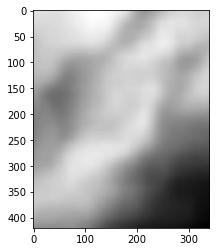

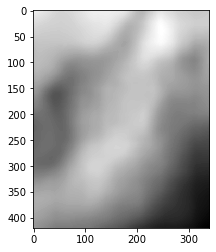

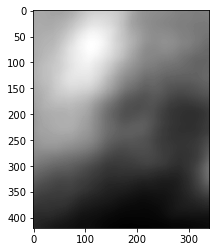

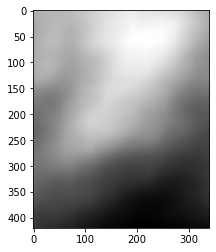

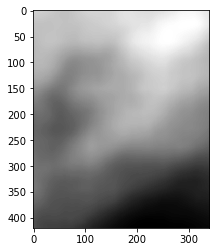

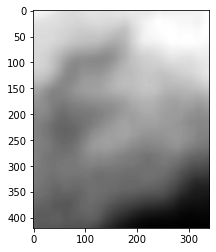

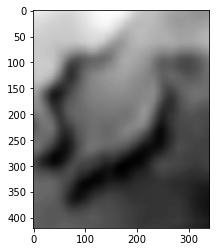

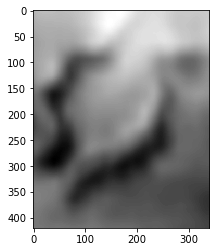

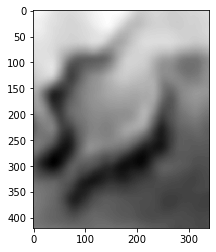

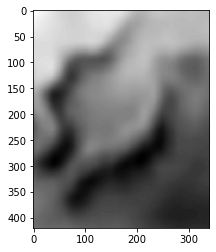

In [15]:
for i in range(190,200):
    img = file[i*420:(i+1)*420]
    img = cv2.GaussianBlur(img.astype(np.float32),(blur,blur),0)   
    img = img.astype(int)
    plt.imshow(img,cmap='gray')
    plt.show()

In [13]:
file = np.array(fuse)

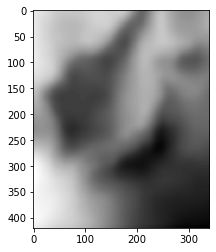

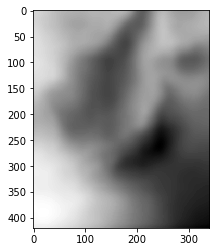

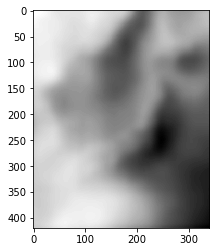

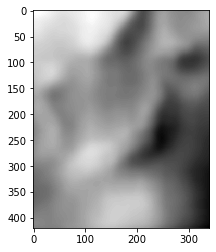

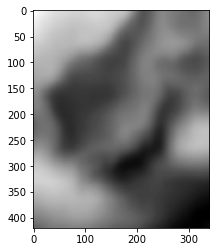

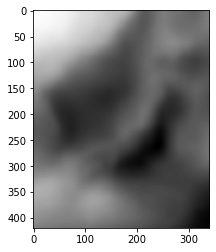

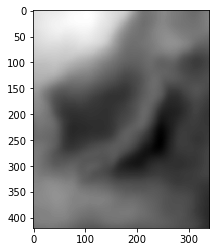

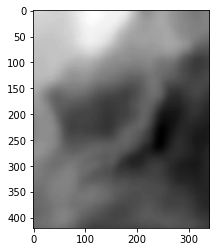

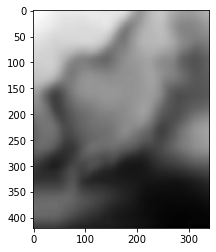

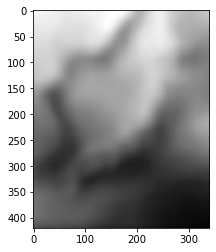

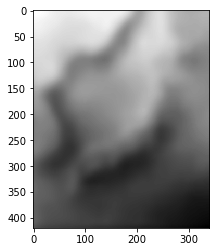

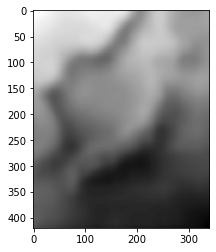

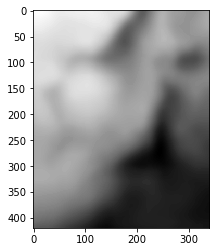

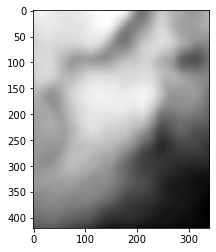

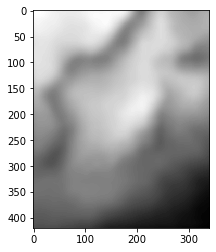

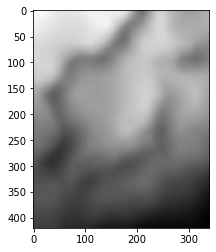

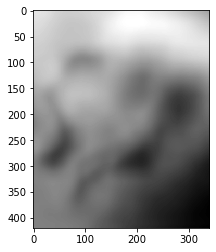

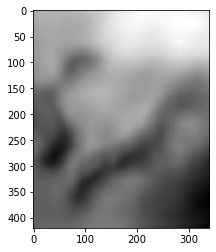

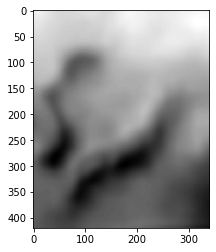

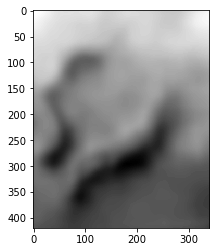

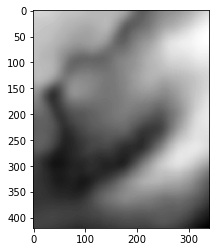

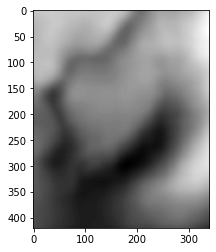

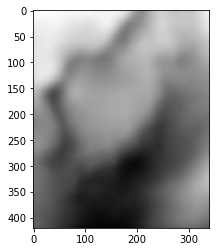

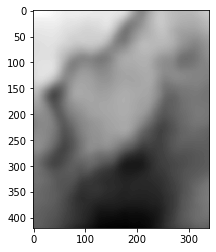

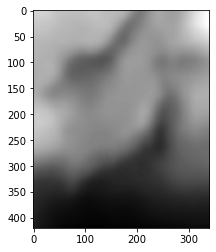

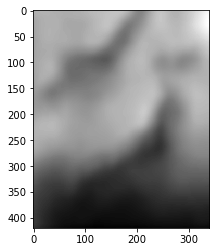

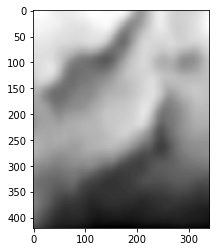

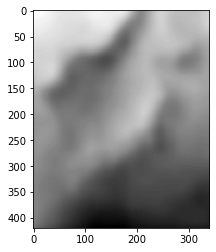

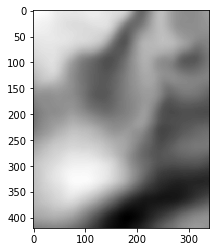

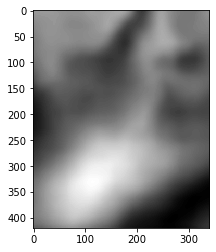

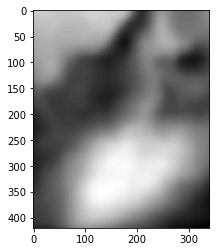

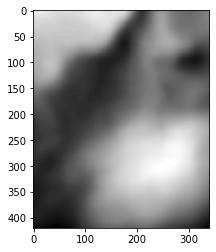

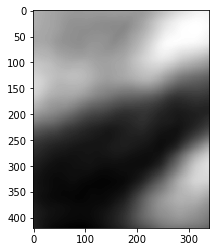

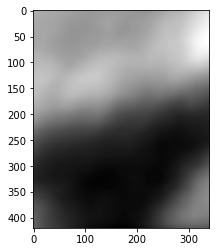

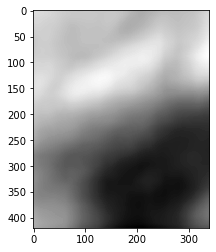

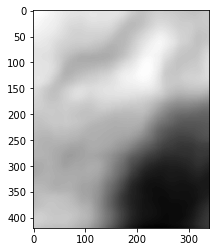

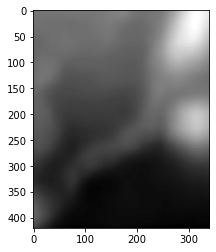

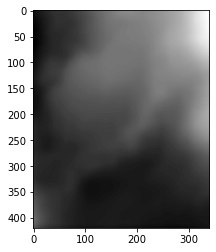

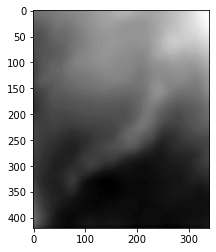

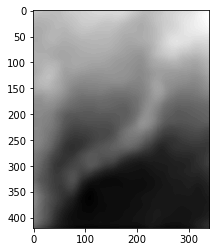

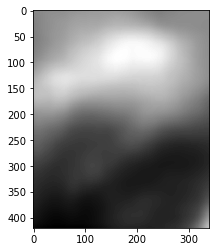

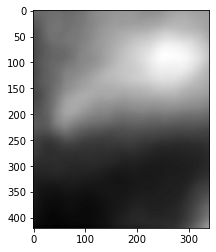

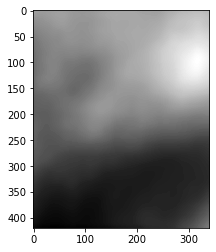

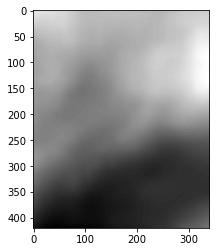

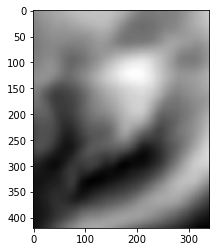

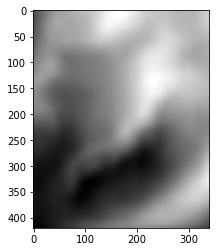

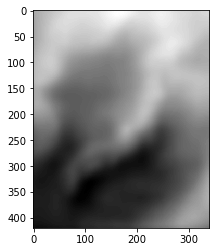

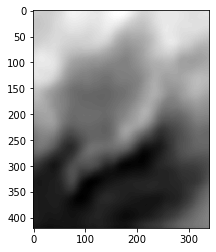

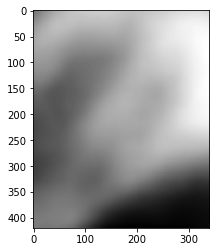

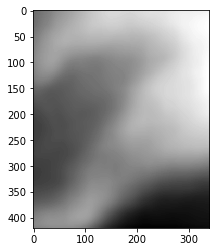

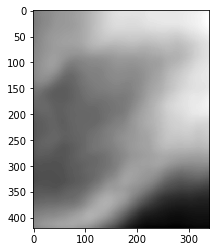

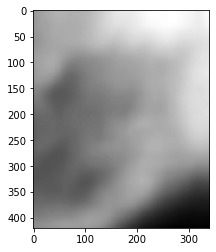

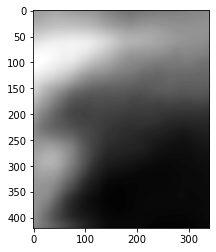

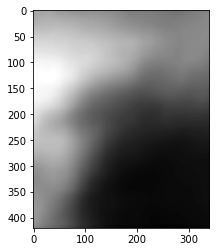

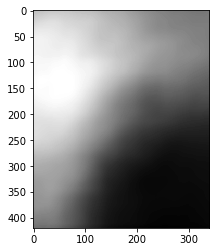

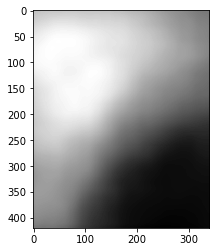

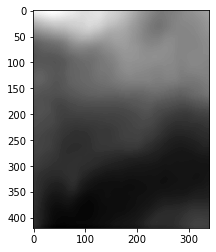

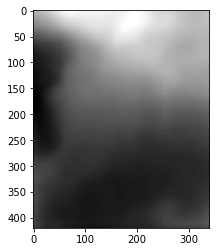

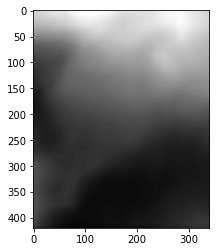

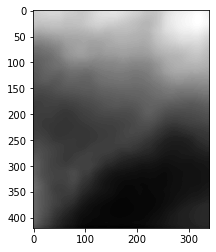

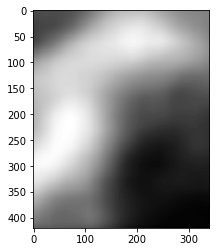

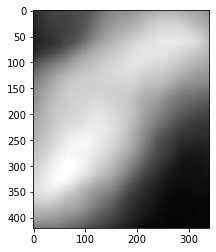

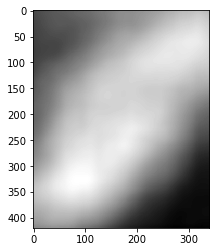

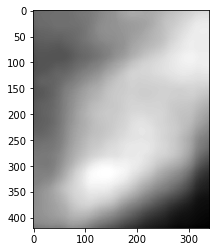

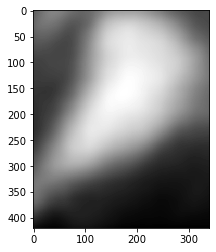

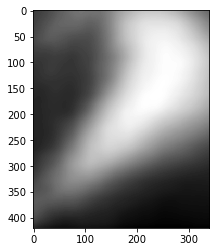

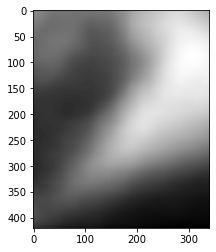

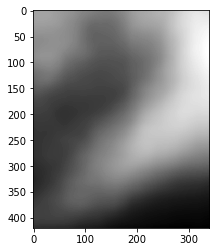

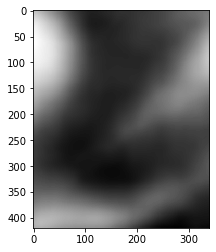

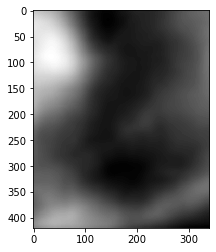

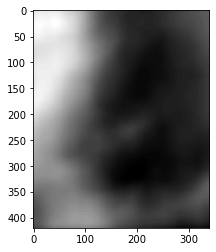

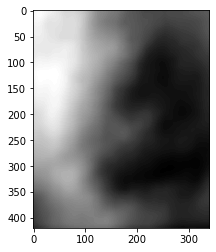

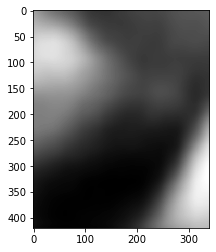

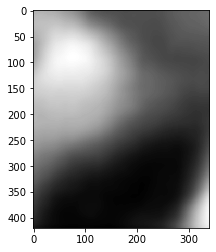

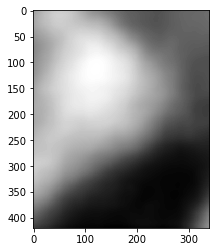

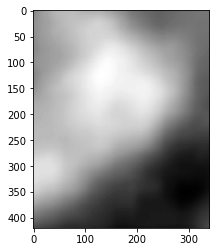

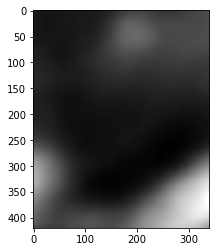

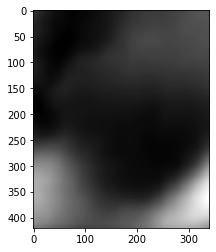

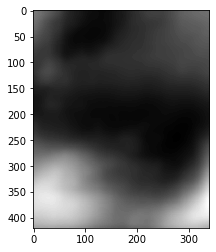

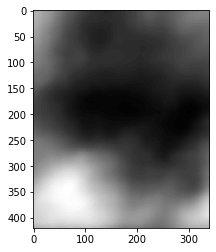

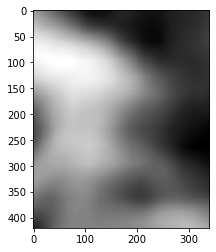

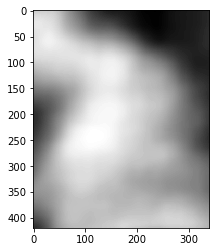

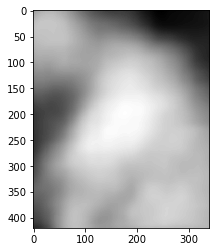

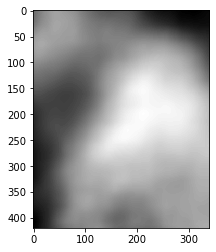

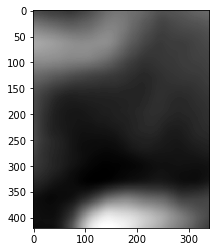

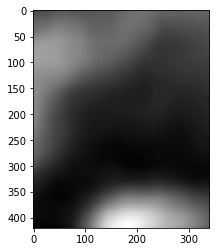

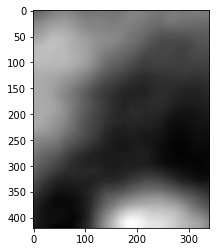

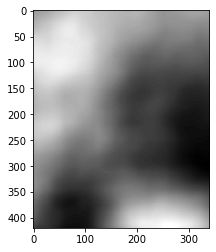

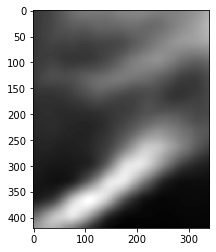

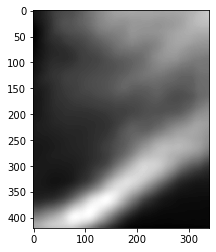

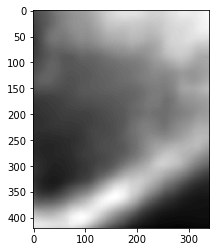

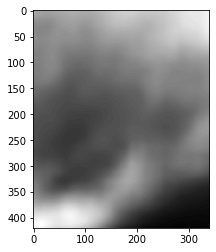

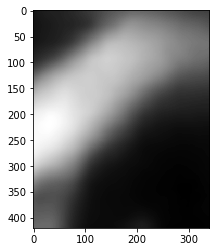

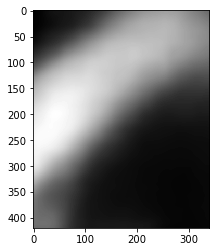

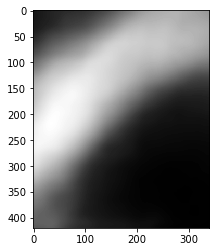

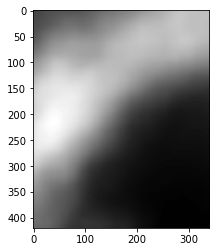

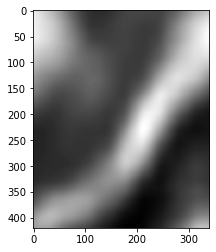

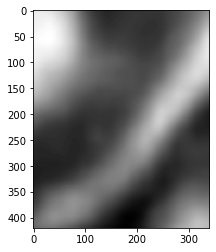

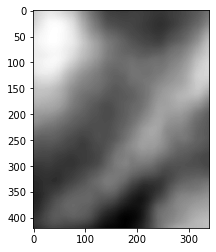

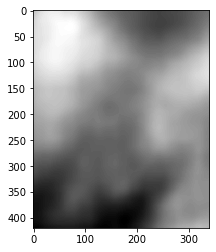

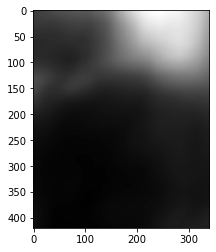

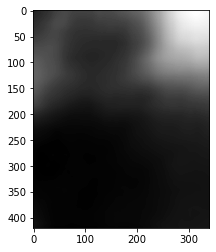

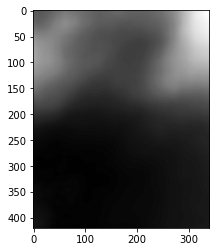

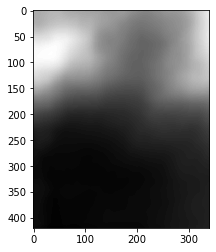

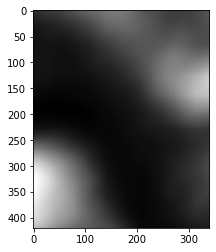

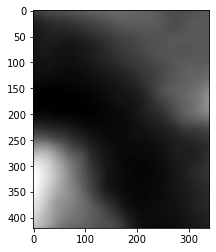

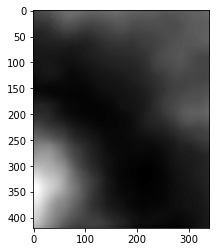

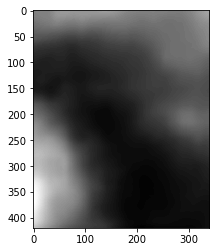

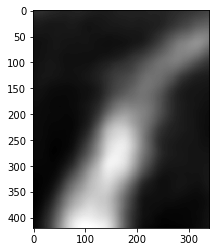

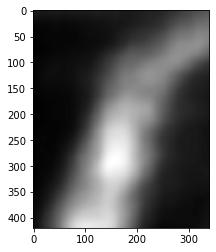

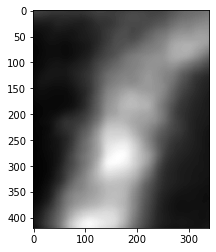

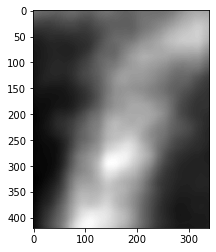

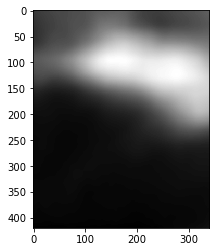

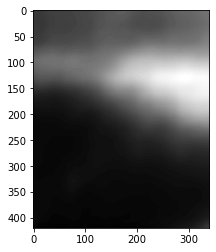

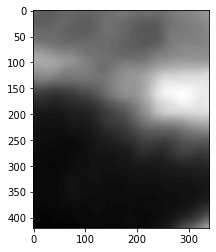

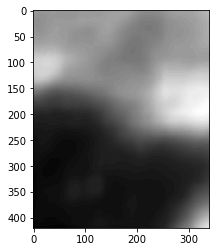

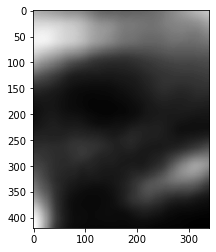

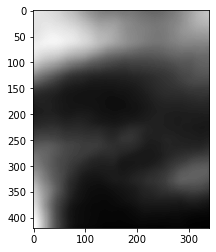

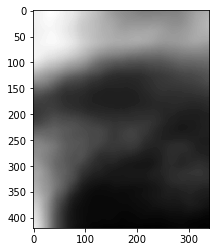

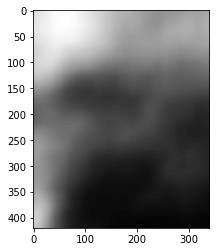

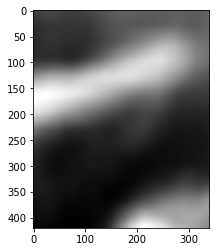

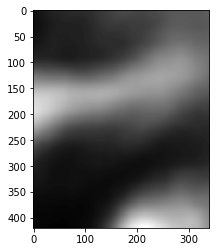

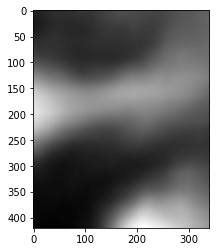

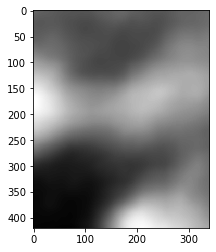

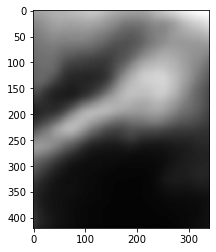

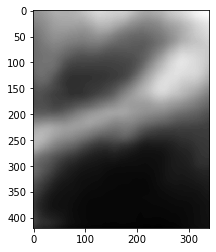

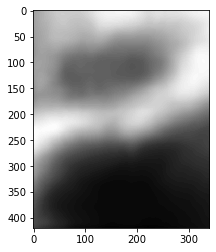

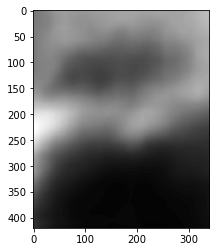

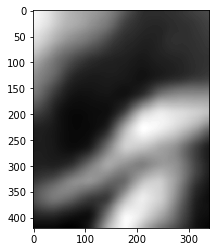

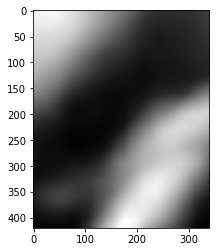

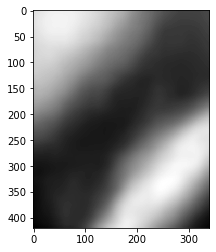

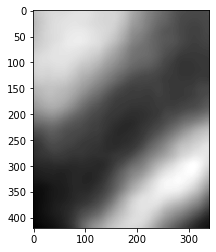

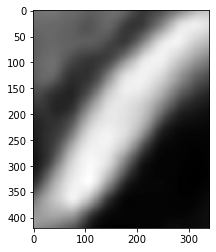

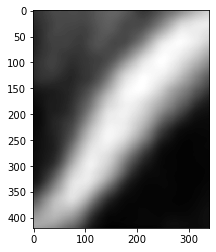

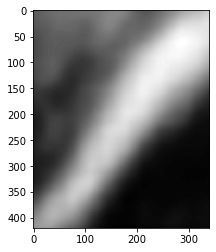

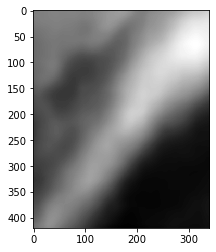

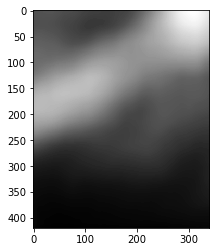

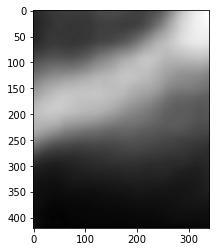

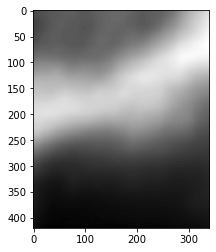

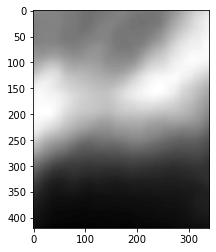

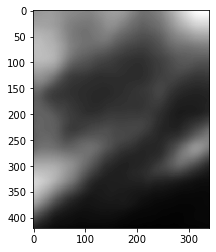

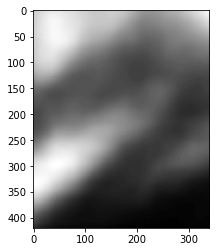

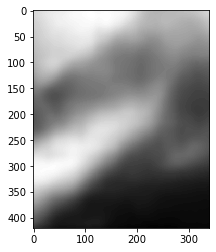

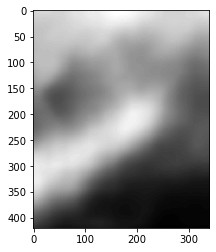

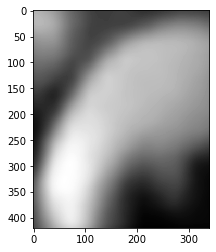

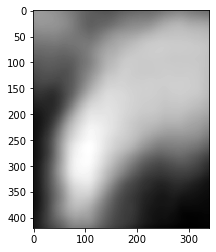

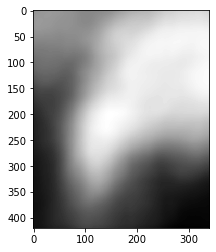

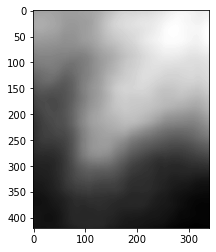

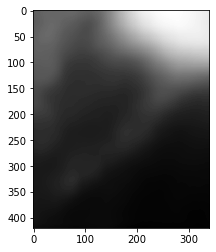

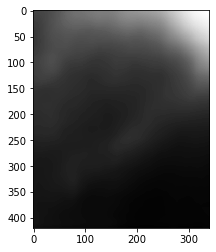

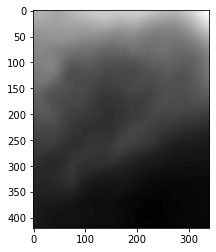

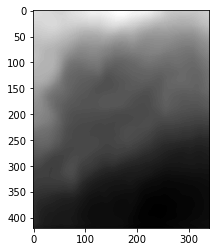

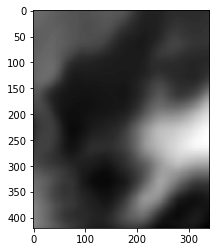

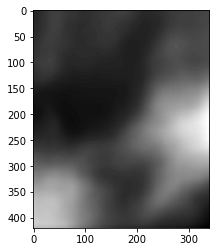

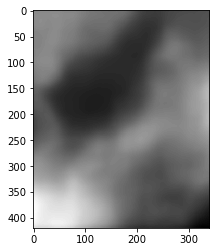

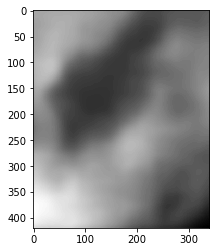

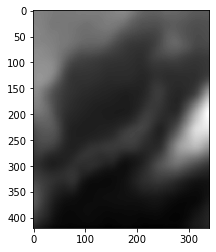

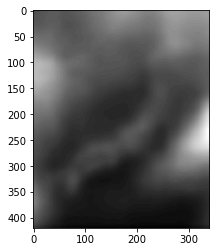

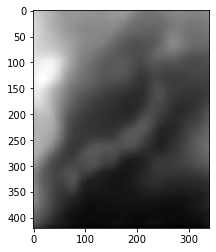

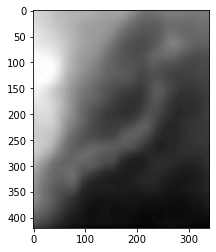

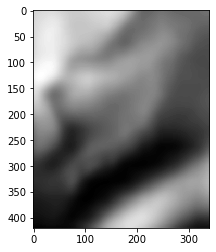

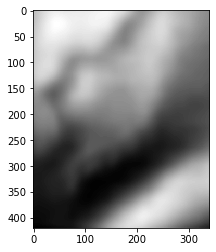

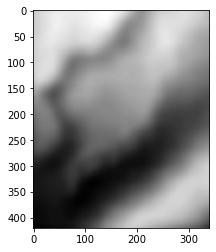

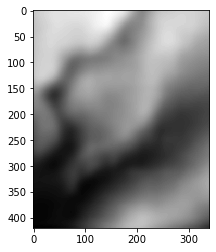

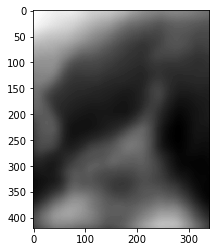

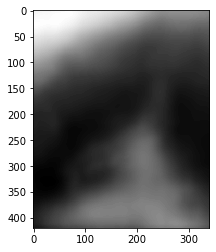

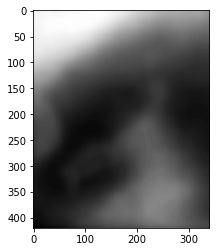

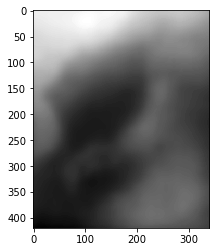

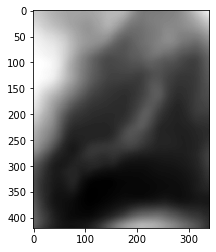

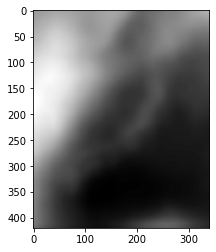

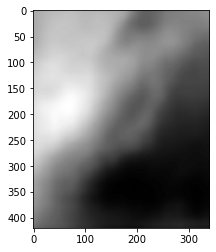

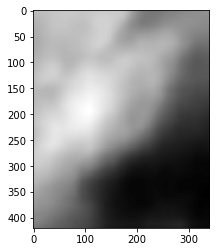

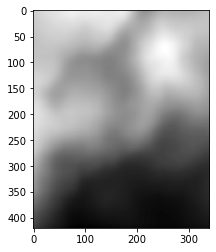

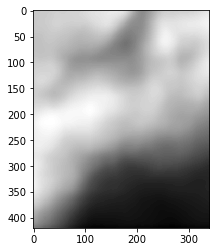

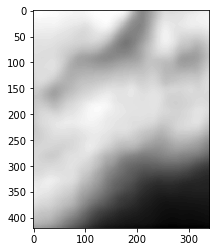

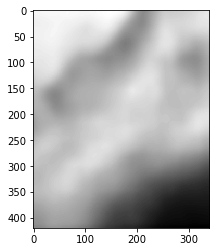

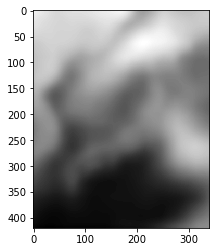

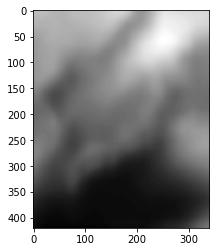

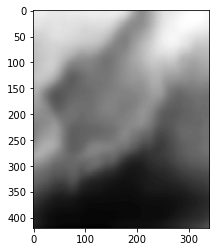

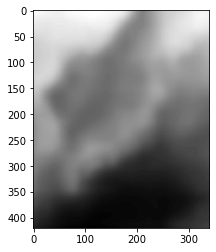

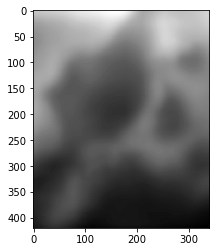

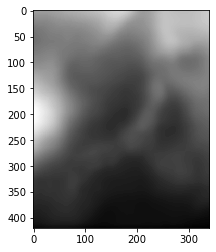

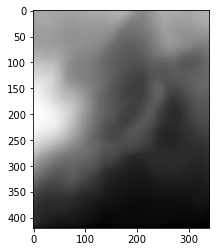

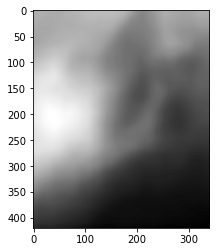

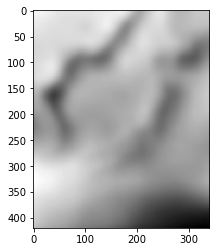

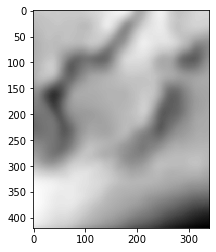

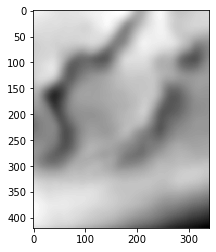

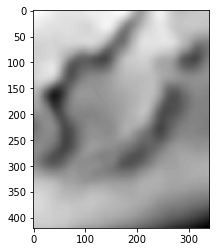

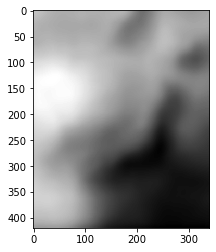

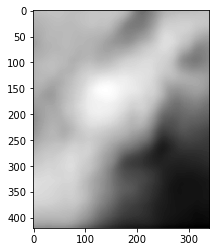

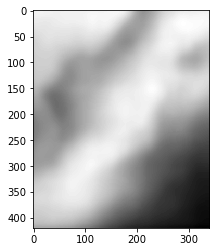

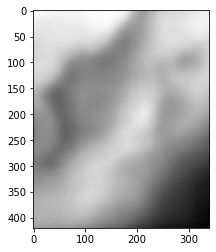

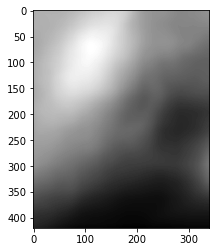

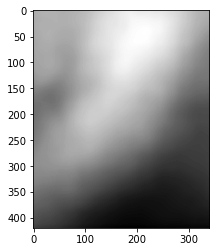

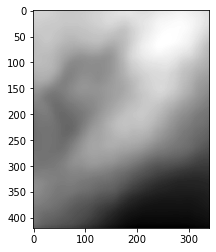

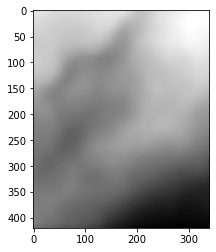

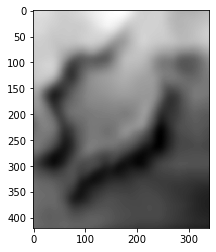

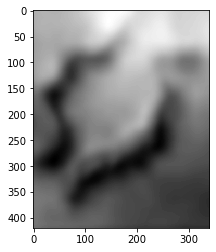

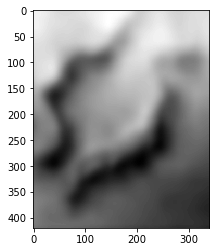

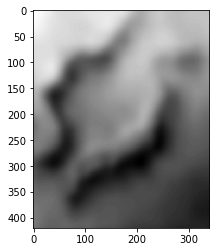

In [14]:
submit = []
for i in range(200):
    img = file[i*420:(i+1)*420] 
    img = cv2.GaussianBlur(img.astype(np.float32),(21,21),0)  
    img = img.astype(int)
    #plt.imshow(img,cmap='gray')
    #plt.show()   
    submit.append(img)
    
submit = np.vstack(submit)

In [33]:
submit = pd.DataFrame(submit)

In [35]:
submit.to_csv('fuse_3D.csv',header=False, index=True)

In [16]:
submit

0    1    2    3    4    5    6    7    8    9    ...  330  331  332  \
0      166  166  166  166  166  165  165  165  165  165  ...  139  139  140   
1      166  166  166  166  166  165  165  165  165  165  ...  139  139  140   
2      166  166  166  166  166  165  165  165  165  165  ...  139  139  140   
3      166  166  166  166  166  165  165  165  165  165  ...  139  139  140   
4      166  166  166  166  166  165  165  165  165  165  ...  139  139  140   
5      166  166  166  166  166  165  165  165  165  165  ...  139  139  140   
6      166  166  166  166  166  165  165  165  165  165  ...  139  140  140   
7      166  166  166  166  166  165  165  165  165  165  ...  139  140  140   
8      166  166  166  166  166  165  165  165  165  165  ...  139  140  140   
9      166  166  166  166  166  165  165  165  165  165  ...  139  140  140   
10     166  166  166  166  166  165  165  165  165  164  ...  139  140  140   
11     166  166  166  166  166  165  165  165  165  164  ...  139  140  140   
12     166  166  166  166  166  165  165  165  165  164  ...  140  140  140   
13     166  166  166  166  166  165  165  165  165  164  ...  140  140  140   
14     166  166  166  166  166  165  165  165  165  164  ...  140  140  141   
15     166  166  166  166  166  165  165  165  165  164  ...  140  140  141   
16     166  166  166  166  166  166  165  165  165  165  ...  140  140  141   
17     166  166  166  166  166  166  165  165  165  165  ...  140  141  141   
18     167  167  166  166  166  166  165  165  165  165  ...  140  141  141   
19     167  167  166  166  166  166  165  165  165  165  ...  140  141  141   
20     167  167  167  166  166  166  165  165  165  165  ...  141  141  141   
21     167  167  167  166  166  166  166  165  165  165  ...  141  141  142   
22     167  167  167  167  166  166  166  165  165  165  ...  141  141  142   
23     167  167  167  167  166  166  166  165  165  165  ...  141  142  142   
24     167  167  167  167  166  166  166  165  165  165  ...  141  142  142   
25     167  167  167  167  167  166  166  166  165  165  ...  142  142  142   
26     168  168  167  167  167  166  166  166  165  165  ...  142  142  142   
27     168  168  168  167  167  167  166  166  165  165  ...  142  142  142   
28     168  168  168  167  167  167  166  166  166  165  ...  142  142  142   
29     168  168  168  168  167  167  167  166  166  165  ...  142  142  142   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
83970  122  122  122  122  121  121  121  121  121  121  ...   90   90   90   
83971  121  121  121  121  121  121  121  121  121  121  ...   90   90   90   
83972  121  121  121  121  121  121  121  121  121  120  ...   90   90   90   
83973  121  121  121  121  121  121  121  121  120  120  ...   90   90   90   
83974  121  121  121  121  121  121  121  120  120  120  ...   90   90   90   
83975  121  121  121  121  121  120  120  120  120  120  ...   90   90   90   
83976  121  121  120  120  120  120  120  120  120  120  ...   90   90   90   
83977  120  120  120  120  120  120  120  120  120  119  ...   90   90   90   
83978  120  120  120  120  120  120  120  120  119  119  ...   90   90   90   
83979  120  120  120  120  120  120  120  119  119  119  ...   90   90   90   
83980  120  120  120  120  120  120  120  119  119  119  ...   90   90   90   
83981  120  120  120  120  120  120  119  119  119  119  ...   90   90   90   
83982  120  120  120  120  120  120  119  119  119  119  ...   90   90   90   
83983  120  120  120  120  120  120  119  119  119  119  ...   90   90   90   
83984  120  120  120  120  120  120  119  119  119  119  ...   90   90   90   
83985  120  120  120  120  120  120  119  119  119  119  ...   90   90   90   
83986  120  120  120  120  120  120  119  119  119  119  ...   90   90   90   
83987  120  120  120  120  120  120  119  119  119  119  ...   90   90   90   
83988  120  120  120  120  120  120  119  119  119  119  